<a href="https://colab.research.google.com/github/guimaraess2/Logistic-Regression/blob/master/Diabetes_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importando as bibliotecas**/**Importing libraries**  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Acessando a base de dados**/**Accessing the database**




In [29]:
!pwd

/content/sample_data


In [30]:
cd sample_data/

[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [31]:
!ls

anscombe.json		      diabetes.csv	     README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [0]:
df = pd.read_csv("diabetes.csv")

**Acessando as primeiras cinco linhas**/**Accessing the first five lines**

In [33]:

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Verificando se há valores nulos**/**Checking for null values**

In [34]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
df.shape

(768, 9)

**Verificando algumas informações estatísticas**/**Checking statistical information**

In [36]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Visualização de dados**/**Data visualization**

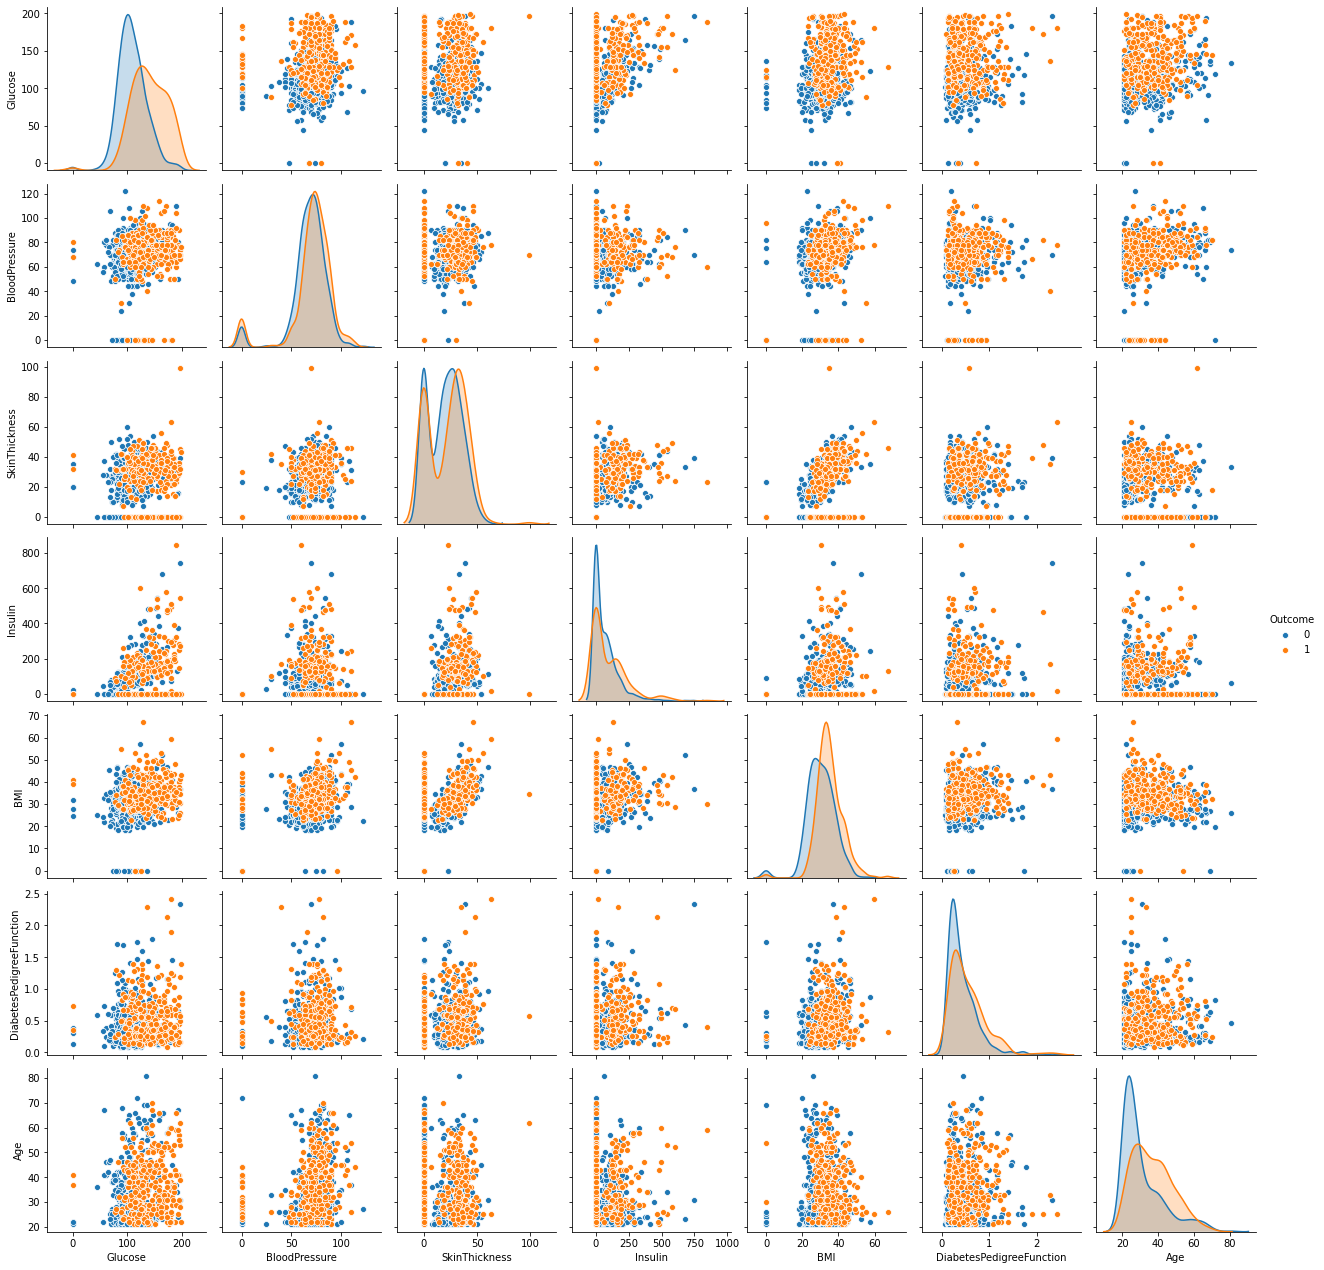

In [37]:
sns.pairplot(df, vars=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],hue ='Outcome')

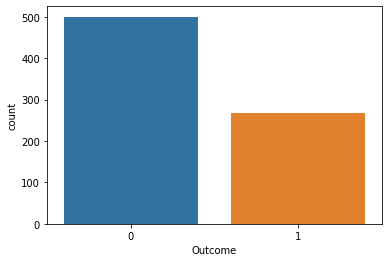

In [38]:
import seaborn as sns
sns.countplot(df['Outcome'],label="Count")

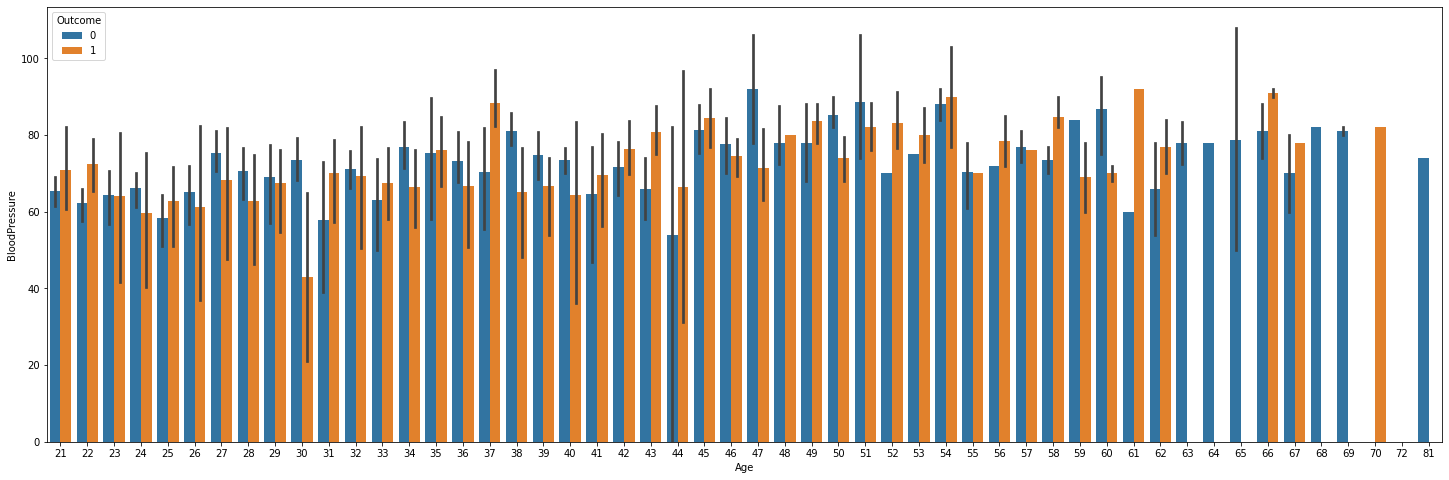

In [39]:
plt.figure(figsize=(25,8))
sns.barplot(x='Age', y='BloodPressure', hue='Outcome', data=df)

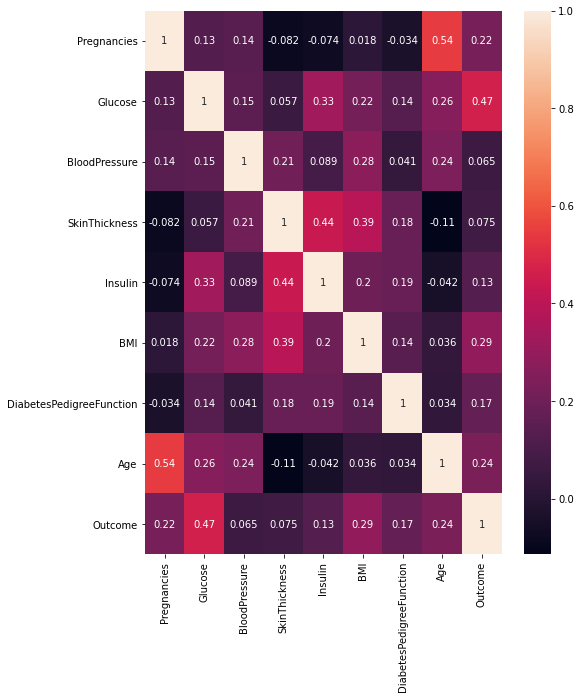

In [40]:
plt.figure(figsize=(8,10))
sns.heatmap(df.corr(), annot=True)

**Separando as variáveis dependentes e independentes**/**Separating dependent and independent variables**

In [0]:
X = df.iloc[:,1:8].values
y = df.iloc[:,-1].values

**Divisão das variáveis de teste e de treino**/Division of test and training variables

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [43]:
print('O número de registros de teste para X é:', X_test.shape)
print('O número de registros de treino para X é:', X_train.shape)
print('O número de registros de teste para y é:', y_test.shape)
print('O número de registros de treino para y é:', y_train.shape)

O número de registros de teste para X é: (116, 7)
O número de registros de treino para X é: (652, 7)
O número de registros de teste para y é: (116,)
O número de registros de treino para y é: (652,)


**Colocando os registros na mesma escala**/**Putting the records on the same scale**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Realizando o treinamento do algoritmo**/**algorithm training**

In [0]:
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(random_state=1)
classificador.fit(X_train, y_train)
previsoes = classificador.predict(X_test)

**Calculo do percentual de acerto do modelo**/**Accuracy calculation** 

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(y_test, previsoes)
matriz = confusion_matrix(y_test, previsoes)

In [47]:

matriz

array([[69,  9],
       [14, 24]])

In [48]:
precisao

0.8017241379310345